In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Object Creation - Series and DataFrame

In [2]:
# creating Series (array)

s1 = pd.Series([[1,3,5,np.nan,6,8]])
s1

0    [1, 3, 5, nan, 6, 8]
dtype: object

In [3]:
# creating DataFrames
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.140750,-0.184316,0.447367,0.953963
2013-01-02,0.730379,0.388422,0.950466,-0.272877
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920
2013-01-04,1.438791,-1.046784,1.147344,0.881445
2013-01-05,-0.513790,0.636080,-2.235292,-0.097834
2013-01-06,2.303139,-0.606245,0.123305,0.175415


In [5]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : pd.Categorical(["test","train","test","train"]),
                         'F' : 'foo' })
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# checking Data Types
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
# Use df2.<TAB> for column name completion as well as attributes which can work on dataframe

#### Viewing Data

In [8]:
# for first 5 records
df.head()

,A,B,C,D
2013-01-01,0.140750,-0.184316,0.447367,0.953963
2013-01-02,0.730379,0.388422,0.950466,-0.272877
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920
2013-01-04,1.438791,-1.046784,1.147344,0.881445
2013-01-05,-0.513790,0.636080,-2.235292,-0.097834


In [9]:
# for last 3
df.tail(3)

,A,B,C,D
2013-01-04,1.438791,-1.046784,1.147344,0.881445
2013-01-05,-0.513790,0.636080,-2.235292,-0.097834
2013-01-06,2.303139,-0.606245,0.123305,0.175415


In [10]:
# checking df index
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# column names
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# df values
df.values

array([[ 0.14074981, -0.18431632,  0.447367  ,  0.95396264],
       [ 0.73037948,  0.38842236,  0.95046629, -0.27287746],
       [ 2.20387997, -1.65422411, -1.01251022, -0.82191989],
       [ 1.43879076, -1.04678426,  1.14734415,  0.88144457],
       [-0.51379045,  0.63608028, -2.23529184, -0.09783429],
       [ 2.30313937, -0.60624487,  0.12330498,  0.17541522]])

#### Summary of Data

In [13]:
# information abt df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [14]:
# describing stastistic summay
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,1.050525,-0.411178,-0.096553,0.136365
std,1.133780,0.868883,1.296217,0.687862
min,-0.513790,-1.654224,-2.235292,-0.821920
25%,0.288157,-0.936649,-0.728556,-0.229117
50%,1.084585,-0.395281,0.285336,0.038790
75%,2.012608,0.245238,0.824691,0.704937
max,2.303139,0.636080,1.147344,0.953963


#### Transposing and Sorting the data

In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.140750,0.730379,2.203880,1.438791,-0.513790,2.303139
B,-0.184316,0.388422,-1.654224,-1.046784,0.636080,-0.606245
C,0.447367,0.950466,-1.012510,1.147344,-2.235292,0.123305
D,0.953963,-0.272877,-0.821920,0.881445,-0.097834,0.175415


In [16]:
# Sorting by index
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.953963,0.447367,-0.184316,0.140750
2013-01-02,-0.272877,0.950466,0.388422,0.730379
2013-01-03,-0.821920,-1.012510,-1.654224,2.203880
2013-01-04,0.881445,1.147344,-1.046784,1.438791
2013-01-05,-0.097834,-2.235292,0.636080,-0.513790
2013-01-06,0.175415,0.123305,-0.606245,2.303139


In [17]:
# sorting by values
df.sort_values(by="B")

,A,B,C,D
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920
2013-01-04,1.438791,-1.046784,1.147344,0.881445
2013-01-06,2.303139,-0.606245,0.123305,0.175415
2013-01-01,0.140750,-0.184316,0.447367,0.953963
2013-01-02,0.730379,0.388422,0.950466,-0.272877
2013-01-05,-0.513790,0.636080,-2.235292,-0.097834


In [18]:
df.sort_values(by=["B", "A"])

,A,B,C,D
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920
2013-01-04,1.438791,-1.046784,1.147344,0.881445
2013-01-06,2.303139,-0.606245,0.123305,0.175415
2013-01-01,0.140750,-0.184316,0.447367,0.953963
2013-01-02,0.730379,0.388422,0.950466,-0.272877
2013-01-05,-0.513790,0.636080,-2.235292,-0.097834


#### Selection of Data

In pandas, data can be accessed with these methods ```.at, .iat, .loc, .iloc and .ix```

In [19]:
# selecting a column A
df['A']

2013-01-01    0.140750
2013-01-02    0.730379
2013-01-03    2.203880
2013-01-04    1.438791
2013-01-05   -0.513790
2013-01-06    2.303139
Freq: D, Name: A, dtype: float64

In [20]:
# slicing rows
df[0:3]

,A,B,C,D
2013-01-01,0.140750,-0.184316,0.447367,0.953963
2013-01-02,0.730379,0.388422,0.950466,-0.272877
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920


In [21]:
df['2013-01-01':'2013-01-03']

,A,B,C,D
2013-01-01,0.140750,-0.184316,0.447367,0.953963
2013-01-02,0.730379,0.388422,0.950466,-0.272877
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920


#### Selection by lable

In [22]:
# cross selection using a lable
df.loc[dates[0]]

A    0.140750
B   -0.184316
C    0.447367
D    0.953963
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
df.loc[:, ['A', 'B']]   # [row, column]

,A,B
2013-01-01,0.140750,-0.184316
2013-01-02,0.730379,0.388422
2013-01-03,2.203880,-1.654224
2013-01-04,1.438791,-1.046784
2013-01-05,-0.513790,0.636080
2013-01-06,2.303139,-0.606245


In [24]:
# Showing label slicing, both endpoints are included
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.730379,0.388422
2013-01-03,2.203880,-1.654224
2013-01-04,1.438791,-1.046784


In [25]:
df.loc['20130102',['A','B']]

A    0.730379
B    0.388422
Name: 2013-01-02 00:00:00, dtype: float64

In [26]:
# For getting a scalar value
df.loc['20130102',['A']]

A    0.730379
Name: 2013-01-02 00:00:00, dtype: float64

In [27]:
df.loc['20130102','B']

0.3884223616646631

In [28]:
# for faster access
#df.at['20130102', 'A']

#### Selection by Position

In [29]:
# Select via the position of the passed integers
df.iloc[3]

A    1.438791
B   -1.046784
C    1.147344
D    0.881445
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
# By integer slices, acting similar to numpy/python
df.iloc[3:5, 2:4]   # row - 3 n 4 , col = 2, 3

,C,D
2013-01-04,1.147344,0.881445
2013-01-05,-2.235292,-0.097834


In [31]:
# By lists of integer position locations, similar to the numpy/python style
df.iloc[[1,3,4], 2:4]

,C,D
2013-01-02,0.950466,-0.272877
2013-01-04,1.147344,0.881445
2013-01-05,-2.235292,-0.097834


In [32]:
# For slicing rows explicitly
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.730379,0.388422,0.950466,-0.272877
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920


In [33]:
# For slicing columns explicitly
df.iloc[:,1:3]

,B,C
2013-01-01,-0.184316,0.447367
2013-01-02,0.388422,0.950466
2013-01-03,-1.654224,-1.012510
2013-01-04,-1.046784,1.147344
2013-01-05,0.636080,-2.235292
2013-01-06,-0.606245,0.123305


In [34]:
# For getting a value explicitly
df.iloc[1,1]

0.3884223616646631

In [35]:
df.loc['2013-01-02', 'B']

0.3884223616646631

In [36]:
# For getting fast access to a scalar (equiv to the prior method)
df.iat[1,1]

0.3884223616646631

#### Boolean Indexing

In [37]:
df.B > 0

2013-01-01    False
2013-01-02     True
2013-01-03    False
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: B, dtype: bool

In [38]:
df[df.B > 0]

,A,B,C,D
2013-01-02,0.730379,0.388422,0.950466,-0.272877
2013-01-05,-0.513790,0.636080,-2.235292,-0.097834


In [39]:
df[df>0]

,A,B,C,D
2013-01-01,0.140750,NaN,0.447367,0.953963
2013-01-02,0.730379,0.388422,0.950466,NaN
2013-01-03,2.203880,NaN,NaN,NaN
2013-01-04,1.438791,NaN,1.147344,0.881445
2013-01-05,NaN,0.636080,NaN,NaN
2013-01-06,2.303139,NaN,0.123305,0.175415


In [40]:
# Using the isin() method for filtering:
df3 = df.copy()

df3['E'] = ['one', 'one','two','three','four','three']

df3

,A,B,C,D,E
2013-01-01,0.140750,-0.184316,0.447367,0.953963,one
2013-01-02,0.730379,0.388422,0.950466,-0.272877,one
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920,two
2013-01-04,1.438791,-1.046784,1.147344,0.881445,three
2013-01-05,-0.513790,0.636080,-2.235292,-0.097834,four
2013-01-06,2.303139,-0.606245,0.123305,0.175415,three


In [41]:
df3[df3['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,2.20388,-1.654224,-1.012510,-0.821920,two
2013-01-05,-0.51379,0.636080,-2.235292,-0.097834,four


#### Setting a new column

In [42]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [43]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.140750,-0.184316,0.447367,0.953963,NaN
2013-01-02,0.730379,0.388422,0.950466,-0.272877,1.0
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920,2.0
2013-01-04,1.438791,-1.046784,1.147344,0.881445,3.0
2013-01-05,-0.513790,0.636080,-2.235292,-0.097834,4.0
2013-01-06,2.303139,-0.606245,0.123305,0.175415,5.0


In [44]:
# Setting values by label
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.184316,0.447367,0.953963,NaN
2013-01-02,0.730379,0.388422,0.950466,-0.272877,1.0
2013-01-03,2.203880,-1.654224,-1.012510,-0.821920,2.0
2013-01-04,1.438791,-1.046784,1.147344,0.881445,3.0
2013-01-05,-0.513790,0.636080,-2.235292,-0.097834,4.0
2013-01-06,2.303139,-0.606245,0.123305,0.175415,5.0


In [45]:
# Setting values by position
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.193270,0.264901,NaN
2013-01-02,-0.208680,-0.296488,-0.790010,-1.391032,1.0
2013-01-03,-1.616674,-0.042173,-1.356455,-0.717640,2.0
2013-01-04,2.156849,-0.201232,0.165786,-0.162465,3.0
2013-01-05,-2.019862,-2.055205,1.369486,1.182199,4.0
2013-01-06,0.815260,0.766377,0.160439,0.353855,5.0


In [46]:
# Setting by assigning with a numpy array
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.193270,5,NaN
2013-01-02,-0.208680,-0.296488,-0.790010,5,1.0
2013-01-03,-1.616674,-0.042173,-1.356455,5,2.0
2013-01-04,2.156849,-0.201232,0.165786,5,3.0
2013-01-05,-2.019862,-2.055205,1.369486,5,4.0
2013-01-06,0.815260,0.766377,0.160439,5,5.0


In [47]:
df2 = df.copy()
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.193270,5,NaN
2013-01-02,-0.208680,-0.296488,-0.790010,5,1.0
2013-01-03,-1.616674,-0.042173,-1.356455,5,2.0
2013-01-04,2.156849,-0.201232,0.165786,5,3.0
2013-01-05,-2.019862,-2.055205,1.369486,5,4.0
2013-01-06,0.815260,0.766377,0.160439,5,5.0


In [48]:
# to replace all the positive value from its negative

df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.193270,-5,NaN
2013-01-02,-0.208680,-0.296488,-0.790010,-5,-1.0
2013-01-03,-1.616674,-0.042173,-1.356455,-5,-2.0
2013-01-04,-2.156849,-0.201232,-0.165786,-5,-3.0
2013-01-05,-2.019862,-2.055205,-1.369486,-5,-4.0
2013-01-06,-0.815260,-0.766377,-0.160439,-5,-5.0


In [49]:
df2[df2 < 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.193270,5,NaN
2013-01-02,0.208680,0.296488,0.790010,5,1.0
2013-01-03,1.616674,0.042173,1.356455,5,2.0
2013-01-04,2.156849,0.201232,0.165786,5,3.0
2013-01-05,2.019862,2.055205,1.369486,5,4.0
2013-01-06,0.815260,0.766377,0.160439,5,5.0


#### Missing Data

In [50]:
# Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.193270,5,NaN,NaN
2013-01-02,-0.208680,-0.296488,-0.790010,5,1.0,NaN
2013-01-03,-1.616674,-0.042173,-1.356455,5,2.0,NaN
2013-01-04,2.156849,-0.201232,0.165786,5,3.0,NaN


In [51]:
df1.loc[dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.193270,5,NaN,NaN
2013-01-02,-0.208680,-0.296488,-0.790010,5,1.0,1.0
2013-01-03,-1.616674,-0.042173,-1.356455,5,2.0,NaN
2013-01-04,2.156849,-0.201232,0.165786,5,3.0,NaN


In [52]:
# to drop any rows that have missing data.
df1.dropna(how='any')   # if any columns have NULL or NaN

,A,B,C,D,F,E
2013-01-02,-0.20868,-0.296488,-0.79001,5,1.0,1.0


In [53]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,-0.20868,-0.296488,-0.79001,5,1.0,1.0


In [54]:
df1.dropna(how='all')   # if ALL columns have NULL or NaN

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.193270,5,NaN,NaN
2013-01-02,-0.208680,-0.296488,-0.790010,5,1.0,1.0
2013-01-03,-1.616674,-0.042173,-1.356455,5,2.0,NaN
2013-01-04,2.156849,-0.201232,0.165786,5,3.0,NaN


#### Filling missing data

In [55]:
df1.fillna(3)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.193270,5,3.0,3.0
2013-01-02,-0.208680,-0.296488,-0.790010,5,1.0,1.0
2013-01-03,-1.616674,-0.042173,-1.356455,5,2.0,3.0
2013-01-04,2.156849,-0.201232,0.165786,5,3.0,3.0


In [56]:
df1.fillna(value=4)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.193270,5,4.0,4.0
2013-01-02,-0.208680,-0.296488,-0.790010,5,1.0,1.0
2013-01-03,-1.616674,-0.042173,-1.356455,5,2.0,4.0
2013-01-04,2.156849,-0.201232,0.165786,5,3.0,4.0


In [57]:
df1.fillna({'F':3, 'E':2.9})   # Fill F column with 3 and E column wih 2.9

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.193270,5,3.0,2.9
2013-01-02,-0.208680,-0.296488,-0.790010,5,1.0,1.0
2013-01-03,-1.616674,-0.042173,-1.356455,5,2.0,2.9
2013-01-04,2.156849,-0.201232,0.165786,5,3.0,2.9


In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,True
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


#### Stats

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 5 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null int32
F    5 non-null float64
dtypes: float64(4), int32(1)
memory usage: 264.0 bytes


In [60]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.0,5.000000
mean,-0.145518,-0.304787,-0.107337,5.0,3.000000
std,1.544449,0.936377,0.933920,0.0,1.581139
min,-2.019862,-2.055205,-1.356455,5.0,1.000000
25%,-1.264676,-0.272674,-0.640825,5.0,2.000000
50%,-0.104340,-0.121702,-0.016415,5.0,3.000000
75%,0.611445,-0.010543,0.164450,5.0,4.000000
max,2.156849,0.766377,1.369486,5.0,5.000000


In [61]:
df.count()

A    6
B    6
C    6
D    6
F    5
dtype: int64

In [62]:
df.mean()  # column wise

A   -0.145518
B   -0.304787
C   -0.107337
D    5.000000
F    3.000000
dtype: float64

In [63]:
df.mean(1)  # row wise

2013-01-01    1.201683
2013-01-02    0.940964
2013-01-03    0.796940
2013-01-04    2.024281
2013-01-05    1.258884
2013-01-06    2.348415
Freq: D, dtype: float64

In [64]:
df.std()

A    1.544449
B    0.936377
C    0.933920
D    0.000000
F    1.581139
dtype: float64

In [65]:
df.std(1)

2013-01-01    2.533850
2013-01-02    2.362652
2013-01-03    2.751355
2013-01-04    2.134913
2013-01-05    3.288437
2013-01-06    2.434258
Freq: D, dtype: float64

In [66]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [67]:
s = s.shift(2)  # shifting the content by 2 index
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [68]:
 df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.616674,-1.042173,-2.356455,4.0,1.0
2013-01-04,-0.843151,-3.201232,-2.834214,2.0,0.0
2013-01-05,-7.019862,-7.055205,-3.630514,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


#### Apply

In [69]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.193270,5,NaN
2013-01-02,-0.208680,-0.296488,-0.983279,10,1.0
2013-01-03,-1.825354,-0.338661,-2.339734,15,3.0
2013-01-04,0.331495,-0.539893,-2.173948,20,6.0
2013-01-05,-1.688367,-2.595098,-0.804461,25,10.0
2013-01-06,-0.873107,-1.828721,-0.644022,30,15.0


In [70]:
df.apply(lambda x: x.max() - x.min())

A    4.176711
B    2.821582
C    2.725941
D    0.000000
F    4.000000
dtype: float64

#### Histogramming

In [71]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    1
2    5
3    0
4    0
5    1
6    4
7    4
8    3
9    0
dtype: int32

In [72]:
s.value_counts()  # checking unique value counts

0    4
4    2
1    2
5    1
3    1
dtype: int64

#### String Methods

In [73]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [74]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Merge
1. Concat

In [75]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.862392,-0.487448,1.767044,1.619584
1,-0.192533,0.452153,0.160491,0.163961
2,0.646025,-0.710062,-0.764748,2.061172
3,-1.356019,-0.077627,-0.947133,0.952742
4,0.883336,1.352857,-1.960570,1.267786
5,1.811561,-2.001506,-0.595290,-0.820276
6,-2.535877,-0.415728,-0.000989,-1.231573
7,-0.021901,1.382943,-0.957129,-0.228767
8,0.813857,-0.864718,1.981206,1.672659
9,-0.443268,0.921847,-0.548603,0.190629


In [76]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.862392 -0.487448  1.767044  1.619584
 1 -0.192533  0.452153  0.160491  0.163961
 2  0.646025 -0.710062 -0.764748  2.061172,
           0         1         2         3
 3 -1.356019 -0.077627 -0.947133  0.952742
 4  0.883336  1.352857 -1.960570  1.267786
 5  1.811561 -2.001506 -0.595290 -0.820276
 6 -2.535877 -0.415728 -0.000989 -1.231573,
           0         1         2         3
 7 -0.021901  1.382943 -0.957129 -0.228767
 8  0.813857 -0.864718  1.981206  1.672659
 9 -0.443268  0.921847 -0.548603  0.190629]

In [77]:
pd.concat(pieces)  # concat rowwise

,0,1,2,3
0,0.862392,-0.487448,1.767044,1.619584
1,-0.192533,0.452153,0.160491,0.163961
2,0.646025,-0.710062,-0.764748,2.061172
3,-1.356019,-0.077627,-0.947133,0.952742
4,0.883336,1.352857,-1.960570,1.267786
5,1.811561,-2.001506,-0.595290,-0.820276
6,-2.535877,-0.415728,-0.000989,-1.231573
7,-0.021901,1.382943,-0.957129,-0.228767
8,0.813857,-0.864718,1.981206,1.672659
9,-0.443268,0.921847,-0.548603,0.190629


In [78]:
pd.concat(pieces, axis=1)  # concat column wise

,0,1,2,3,0,1,2,3,0,1,2,3
0,0.862392,-0.487448,1.767044,1.619584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.192533,0.452153,0.160491,0.163961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.646025,-0.710062,-0.764748,2.061172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-1.356019,-0.077627,-0.947133,0.952742,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.883336,1.352857,-1.960570,1.267786,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.811561,-2.001506,-0.595290,-0.820276,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-2.535877,-0.415728,-0.000989,-1.231573,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.021901,1.382943,-0.957129,-0.228767
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813857,-0.864718,1.981206,1.672659
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.443268,0.921847,-0.548603,0.190629


#### Join

```
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
```

In [79]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,foo,5


In [81]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [82]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

left

,key,lval
0,foo,1
1,bar,2


In [83]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### Append

In [84]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.770577,-0.170541,-1.076229,-0.451980
1,1.916760,0.572713,1.164140,0.632860
2,-1.005490,-1.477879,-0.110988,0.870474
3,-0.316136,0.618400,-1.937116,-0.129132
4,0.175017,-0.135414,-0.088902,1.275741
5,0.385744,-0.969253,-0.307694,0.746990
6,1.229319,-1.976747,-0.243775,0.166781
7,-0.940357,-0.894759,0.202037,0.233910


In [85]:
s = df.iloc[3]
s

A   -0.316136
B    0.618400
C   -1.937116
D   -0.129132
Name: 3, dtype: float64

In [86]:
df.append(s, ignore_index=True)
df

,A,B,C,D
0,-0.770577,-0.170541,-1.076229,-0.451980
1,1.916760,0.572713,1.164140,0.632860
2,-1.005490,-1.477879,-0.110988,0.870474
3,-0.316136,0.618400,-1.937116,-0.129132
4,0.175017,-0.135414,-0.088902,1.275741
5,0.385744,-0.969253,-0.307694,0.746990
6,1.229319,-1.976747,-0.243775,0.166781
7,-0.940357,-0.894759,0.202037,0.233910


#### Grouping

By “group by” we are referring to a process involving one or more of the following steps

        Splitting the data into groups based on some criteria
        Applying a function to each group independently
        Combining the results into a data structure

In [87]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.206509,-0.437572
1,bar,one,-1.189741,-0.096997
2,foo,two,1.289879,-0.130252
3,bar,three,0.103044,0.251160
4,foo,two,1.495027,-1.839108
5,bar,two,1.084158,-0.955764
6,foo,one,0.064089,0.721713
7,foo,three,-1.174013,1.183452


In [88]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.002539,-0.801601
foo,1.881491,-0.501767


In [89]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.189741 -0.096997
    three  0.103044  0.251160
    two    1.084158 -0.955764
foo one    0.270598  0.284141
    three -1.174013  1.183452
    two    2.784906 -1.969361

#### Reshaping

In [90]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [91]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.077103  0.071665
      two     0.243469  0.789529
baz   one    -0.452906  0.148716
      two    -0.829278 -1.180111
foo   one    -0.251384 -0.004602
      two    -0.857481  0.512469
qux   one     1.660127 -1.580966
      two     0.521759 -1.693887

The stack() method “compresses” a level in the DataFrame’s columns

In [92]:
df.stack()

first  second   
bar    one     A    0.077103
               B    0.071665
       two     A    0.243469
               B    0.789529
baz    one     A   -0.452906
               B    0.148716
       two     A   -0.829278
               B   -1.180111
foo    one     A   -0.251384
               B   -0.004602
       two     A   -0.857481
               B    0.512469
qux    one     A    1.660127
               B   -1.580966
       two     A    0.521759
               B   -1.693887
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [93]:
df.unstack()  # this will unstack the inner index (last level)

A                   B          
second       one       two       one       two
first                                         
bar     0.077103  0.243469  0.071665  0.789529
baz    -0.452906 -0.829278  0.148716 -1.180111
foo    -0.251384 -0.857481 -0.004602  0.512469
qux     1.660127  0.521759 -1.580966 -1.693887

In [94]:
df.unstack('first')  # unstacking by lable

A                                       B                      \
first        bar       baz       foo       qux       bar       baz       foo   
second                                                                         
one     0.077103 -0.452906 -0.251384  1.660127  0.071665  0.148716 -0.004602   
two     0.243469 -0.829278 -0.857481  0.521759  0.789529 -1.180111  0.512469   

                  
first        qux  
second            
one    -1.580966  
two    -1.693887

In [95]:
df.unstack('second')  

A                   B          
second       one       two       one       two
first                                         
bar     0.077103  0.243469  0.071665  0.789529
baz    -0.452906 -0.829278  0.148716 -1.180111
foo    -0.251384 -0.857481 -0.004602  0.512469
qux     1.660127  0.521759 -1.580966 -1.693887

In [96]:
df.unstack(0)    # unstacking by index

A                                       B                      \
first        bar       baz       foo       qux       bar       baz       foo   
second                                                                         
one     0.077103 -0.452906 -0.251384  1.660127  0.071665  0.148716 -0.004602   
two     0.243469 -0.829278 -0.857481  0.521759  0.789529 -1.180111  0.512469   

                  
first        qux  
second            
one    -1.580966  
two    -1.693887

#### Pivot Tables

In [97]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                       'B' : ['A', 'B', 'C'] * 4,
                       'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D' : np.random.randn(12),
                       'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.869958,-2.824236
1,one,B,foo,-1.263218,0.101729
2,two,C,foo,-0.743723,1.409101
3,three,A,bar,0.292353,0.282451
4,one,B,bar,-0.091658,-0.752110
5,one,C,bar,1.295819,-0.448113
6,two,A,foo,1.573841,0.196957
7,three,B,foo,-0.645814,1.409150
8,one,C,foo,0.635127,-1.389018
9,one,A,bar,-1.174726,-0.077247


In [98]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.174726  0.869958
      B -0.091658 -1.263218
      C  1.295819  0.635127
three A  0.292353       NaN
      B       NaN -0.645814
      C  1.441732       NaN
two   A       NaN  1.573841
      B  1.264011       NaN
      C       NaN -0.743723

#### Time Series

In [99]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng[:5]

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='S')

In [100]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts[:8]

2012-01-01 00:00:00      0
2012-01-01 00:00:01    175
2012-01-01 00:00:02      9
2012-01-01 00:00:03    173
2012-01-01 00:00:04    285
2012-01-01 00:00:05    262
2012-01-01 00:00:06    148
2012-01-01 00:00:07    255
Freq: S, dtype: int32

In [101]:
ts.sum()

26318

In [102]:
ts.resample('5Min').sum()

2012-01-01    26318
Freq: 5T, dtype: int32

In [103]:
ts.resample('5Min')

C:\Anaconda3\lib\site-packages\IPython\lib\pretty.py:108: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  return getattr(obj, attr, default)


DatetimeIndexResampler [freq=<5 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0]

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.166836
2012-03-07    0.309653
2012-03-08    0.953754
2012-03-09    0.606327
2012-03-10   -0.804818
Freq: D, dtype: float64

In [106]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.166836
2012-03-07 00:00:00+00:00    0.309653
2012-03-08 00:00:00+00:00    0.953754
2012-03-09 00:00:00+00:00    0.606327
2012-03-10 00:00:00+00:00   -0.804818
Freq: D, dtype: float64

Convert to another time zone

In [107]:
ts_utc.tz_convert('Asia/Calcutta')

2012-03-06 05:30:00+05:30    1.166836
2012-03-07 05:30:00+05:30    0.309653
2012-03-08 05:30:00+05:30    0.953754
2012-03-09 05:30:00+05:30    0.606327
2012-03-10 05:30:00+05:30   -0.804818
Freq: D, dtype: float64

Converting between time span representations

In [108]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -1.609627
2012-02-29   -1.381380
2012-03-31    1.065309
2012-04-30   -0.192158
2012-05-31   -0.742545
Freq: M, dtype: float64

In [109]:
ps = ts.to_period()
ps

2012-01   -1.609627
2012-02   -1.381380
2012-03    1.065309
2012-04   -0.192158
2012-05   -0.742545
Freq: M, dtype: float64

In [110]:
ps.to_timestamp()

2012-01-01   -1.609627
2012-02-01   -1.381380
2012-03-01    1.065309
2012-04-01   -0.192158
2012-05-01   -0.742545
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [111]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)

ts.head()

1990Q1   -0.583649
1990Q2    0.855731
1990Q3   -0.625833
1990Q4    1.185059
1991Q1   -0.317823
Freq: Q-NOV, dtype: float64

In [112]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

ts.head()

1990-03-01 09:00   -0.583649
1990-06-01 09:00    0.855731
1990-09-01 09:00   -0.625833
1990-12-01 09:00    1.185059
1991-03-01 09:00   -0.317823
Freq: H, dtype: float64

#### Categoricals

In [113]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [114]:
df.dtypes

id            int64
raw_grade    object
dtype: object

In [115]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [116]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [117]:
# Reorder the categories and simultaneously add the
# missing categories (methods under Series .cat return a new Series per default).

df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [118]:
# Sorting is per order in the categories, not lexical order.
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [119]:
# Grouping by a categorical column shows also empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

#### Plotting

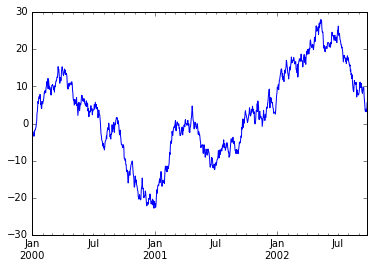

In [120]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

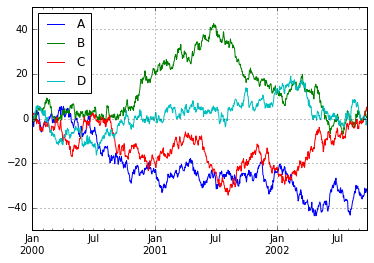

In [121]:
# On DataFrame, plot() is a convenience to plot all of the columns with labels:

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot(grid=True)

#### Data Read and Write 

In [122]:
df[:4]

,A,B,C,D
2000-01-01,0.383624,0.429101,0.743808,1.577623
2000-01-02,-0.609680,0.453151,1.483189,0.865432
2000-01-03,-0.652463,0.116940,2.300037,-0.406062
2000-01-04,-1.804128,0.703522,1.802338,-0.694557


to_csv and read_csv

In [123]:
# writing it to csv
df.to_csv("dataset/df_as_csv.csv")

In [124]:
# reading it 
df2 = pd.read_csv("dataset/df_as_csv.csv")
df2.head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.383624,0.429101,0.743808,1.577623
1,2000-01-02,-0.609680,0.453151,1.483189,0.865432
2,2000-01-03,-0.652463,0.116940,2.300037,-0.406062
3,2000-01-04,-1.804128,0.703522,1.802338,-0.694557
4,2000-01-05,-3.547775,0.947640,1.720123,-0.952502


for hdfs, to_hdf and read_hdf

In [125]:
df.to_hdf('foo.h5','df')

In [126]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
2000-01-01,0.383624,0.429101,0.743808,1.577623
2000-01-02,-0.609680,0.453151,1.483189,0.865432
2000-01-03,-0.652463,0.116940,2.300037,-0.406062
2000-01-04,-1.804128,0.703522,1.802338,-0.694557
2000-01-05,-3.547775,0.947640,1.720123,-0.952502


For Excel, to_excel and read_excel

In [127]:
 df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [129]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,A,B,C,D
2000-01-01,0.383624,0.429101,0.743808,1.577623
2000-01-02,-0.609680,0.453151,1.483189,0.865432
2000-01-03,-0.652463,0.116940,2.300037,-0.406062
2000-01-04,-1.804128,0.703522,1.802338,-0.694557
2000-01-05,-3.547775,0.947640,1.720123,-0.952502
